# Clustering and Anomaly Detection in Well Log Data using KMeans and Isolation Forest


## Application Summary

### Machine Learning Techniques Used:
- **KMeans**: For grouping similar data points into clusters.
- **Isolation Forest**: For identifying outliers/anomalies in the data.

### Well Log Focus:
- The analysis was performed on the following well log measurements:
  - **GR (Gamma Ray)**
  - **RHOB (Bulk Density)**
  - **DT (Sonic Log)**
  - **NPHI (Neutron Porosity Log)**
- Data was analyzed for **two wells**: `F17-04` and `F15-A-01`.

### Output:
- Clustering and anomaly detection results are:
  - Visualized as scatter plots with high-resolution contours.
  - Saved as datasets for further analysis.
- These results will be used for the next step: **Comparison of GMM vs GAN to detect anomalies that fall outside the learned patterns.**.


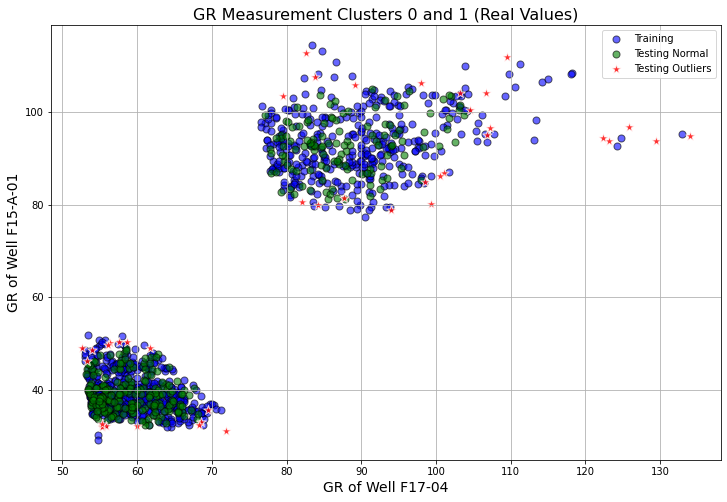

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import os

# Load the dataset
well_data = pd.read_csv("/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-GMM work/prof Tapan/orginal datset/Orginal GR.csv")

# Data preprocessing: Impute missing values
imputer = SimpleImputer(strategy="mean")
well_data_imputed = imputer.fit_transform(well_data)
well_data = pd.DataFrame(well_data_imputed, columns=well_data.columns)

# Scaling only the gamma ray measurements
X_gamma_only = well_data[["GR_F17-04", "GR_F15-A-01"]]
scaler = StandardScaler()
X_gamma_only_scaled = scaler.fit_transform(X_gamma_only)

# Apply clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_gamma_only_scaled)

# Inverse transform to real values
X_gamma_only_real = scaler.inverse_transform(X_gamma_only_scaled)

# Filter for clusters 0 and 1
cluster_filter = np.isin(y_kmeans, [0, 1])
filtered_data = well_data[cluster_filter]
filtered_clusters = y_kmeans[cluster_filter]
X_filtered = X_gamma_only_real[cluster_filter]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, filtered_clusters, test_size=0.3, random_state=42)

# Use Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)
outlier_preds = iso_forest.predict(X_test)

# IsolationForest labels outliers as -1, and inliers as 1
test_outliers = outlier_preds == -1

# Separate the data
train_data = pd.DataFrame(X_train, columns=["GR_F17-04", "GR_F15-A-01"])
train_data["Cluster"] = y_train
test_normal_data = pd.DataFrame(X_test[~test_outliers], columns=["GR_F17-04", "GR_F15-A-01"])
test_normal_data["Cluster"] = y_test[~test_outliers]
test_outliers_data = pd.DataFrame(X_test[test_outliers], columns=["GR_F17-04", "GR_F15-A-01"])
test_outliers_data["Cluster"] = y_test[test_outliers]

# Ensure directories exist
output_dir = "/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-GMM work/prof Tapan/orginal datset/"
os.makedirs(output_dir, exist_ok=True)

# Save the data
train_data.to_csv(os.path.join(output_dir, "train.GR.csv"), index=False)
test_normal_data.to_csv(os.path.join(output_dir, "test.GR.csv"), index=False)
test_outliers_data.to_csv(os.path.join(output_dir, "outlier.GR.csv"), index=False)

# Visualization
plt.figure(figsize=(12, 8))

# Plotting training data
plt.scatter(train_data["GR_F17-04"], train_data["GR_F15-A-01"], c="blue", label="Training", alpha=0.6, edgecolor="k", s=50)

# Plotting normal test data
plt.scatter(test_normal_data["GR_F17-04"], test_normal_data["GR_F15-A-01"], c="green", label="Testing Normal", marker="o", edgecolor="k", s=50, alpha=0.6)

# Plotting outliers
plt.scatter(test_outliers_data["GR_F17-04"], test_outliers_data["GR_F15-A-01"], c="red", label="Testing Outliers", marker="*", edgecolor="white", s=100, alpha=0.8)

# Update axis labels to reflect the well names
plt.title("GR Measurement Clusters 0 and 1 (Real Values)", fontsize=16)
plt.xlabel("GR of Well F17-04", fontsize=14)
plt.ylabel("GR of Well F15-A-01", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(output_dir, "GR_measurement_clusters.png"), dpi=600, bbox_inches="tight")
plt.show()


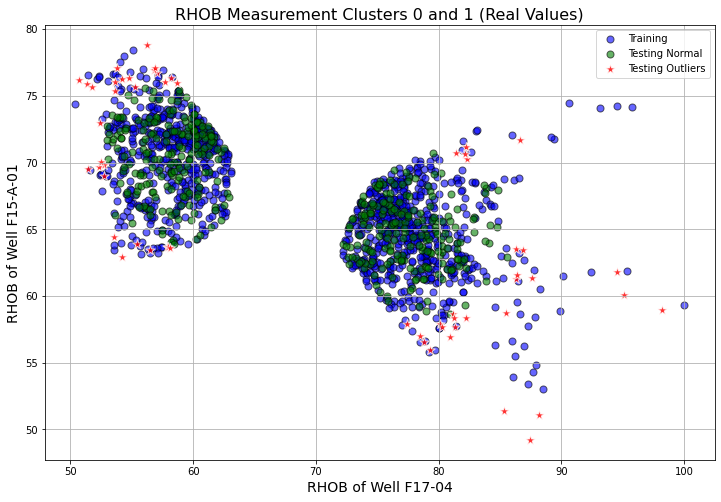

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import os

# Load the dataset
well_data = pd.read_csv("/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-for-anomaly-detection-master/datasets/GMM/normalized_Orginal GMM DATA, RHOB.csv")

# Data preprocessing: Impute missing values
imputer = SimpleImputer(strategy="mean")
well_data_imputed = imputer.fit_transform(well_data)
well_data = pd.DataFrame(well_data_imputed, columns=well_data.columns)

# Scaling only the gamma ray measurements
X_gamma_only = well_data[["RHOB_F17-04", "RHOB_F15-A-01"]]
scaler = StandardScaler()
X_gamma_only_scaled = scaler.fit_transform(X_gamma_only)

# Apply clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_gamma_only_scaled)

# Inverse transform to real values
X_gamma_only_real = scaler.inverse_transform(X_gamma_only_scaled)

# Filter for clusters 0 and 1
cluster_filter = np.isin(y_kmeans, [0, 1])
filtered_data = well_data[cluster_filter]
filtered_clusters = y_kmeans[cluster_filter]
X_filtered = X_gamma_only_real[cluster_filter]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, filtered_clusters, test_size=0.3, random_state=42)

# Use Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)
outlier_preds = iso_forest.predict(X_test)

# IsolationForest labels outliers as -1, and inliers as 1
test_outliers = outlier_preds == -1

# Separate the data
train_data = pd.DataFrame(X_train, columns=["RHOB_F17-04", "RHOB_F15-A-01"])
train_data["Cluster"] = y_train
test_normal_data = pd.DataFrame(X_test[~test_outliers], columns=["RHOB_F17-04", "RHOB_F15-A-01"])
test_normal_data["Cluster"] = y_test[~test_outliers]
test_outliers_data = pd.DataFrame(X_test[test_outliers], columns=["RHOB_F17-04", "RHOB_F15-A-01"])
test_outliers_data["Cluster"] = y_test[test_outliers]

# Combine normal test data and outlier test data
combined_test_data = pd.concat([test_normal_data, test_outliers_data])

# Ensure directories exist
output_dir = "/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-GMM work/prof Tapan/orginal datset/"
os.makedirs(output_dir, exist_ok=True)

# Save the data
train_data.to_csv(os.path.join(output_dir, "train.RHOB.csv"), index=False)
combined_test_data.to_csv(os.path.join(output_dir, "test.RHOB.csv"), index=False)

# Visualization
plt.figure(figsize=(12, 8))

# Plotting training data
plt.scatter(train_data["RHOB_F17-04"], train_data["RHOB_F15-A-01"], c="blue", label="Training", alpha=0.6, edgecolor="k", s=50)

# Plotting normal test data
plt.scatter(test_normal_data["RHOB_F17-04"], test_normal_data["RHOB_F15-A-01"], c="green", label="Testing Normal", marker="o", edgecolor="k", s=50, alpha=0.6)

# Plotting outliers
plt.scatter(test_outliers_data["RHOB_F17-04"], test_outliers_data["RHOB_F15-A-01"], c="red", label="Testing Outliers", marker="*", edgecolor="white", s=100, alpha=0.8)

# Update axis labels to reflect the well names
plt.title("RHOB Measurement Clusters 0 and 1 (Real Values)", fontsize=16)
plt.xlabel("RHOB of Well F17-04", fontsize=14)
plt.ylabel("RHOB of Well F15-A-01", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(output_dir, "RHOB_measurement_clusters.png"), dpi=600, bbox_inches="tight")
plt.show()


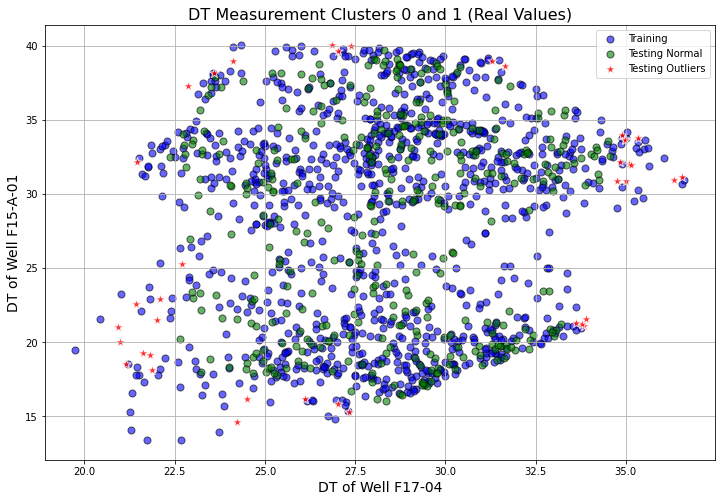

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import os

# Load the dataset
well_data = pd.read_csv("/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-for-anomaly-detection-master/datasets/GMM/normalized_Orginal GMM DATA DT.csv")

# Data preprocessing: Impute missing values
imputer = SimpleImputer(strategy="mean")
well_data_imputed = imputer.fit_transform(well_data)
well_data = pd.DataFrame(well_data_imputed, columns=well_data.columns)

# Scaling only the gamma ray measurements
X_gamma_only = well_data[["DT_F17-04", "DT_F15-A-01"]]
scaler = StandardScaler()
X_gamma_only_scaled = scaler.fit_transform(X_gamma_only)

# Apply clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_gamma_only_scaled)

# Inverse transform to real values
X_gamma_only_real = scaler.inverse_transform(X_gamma_only_scaled)

# Filter for clusters 0 and 1
cluster_filter = np.isin(y_kmeans, [0, 1])
filtered_data = well_data[cluster_filter]
filtered_clusters = y_kmeans[cluster_filter]
X_filtered = X_gamma_only_real[cluster_filter]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, filtered_clusters, test_size=0.3, random_state=42)

# Use Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)
outlier_preds = iso_forest.predict(X_test)

# IsolationForest labels outliers as -1, and inliers as 1
test_outliers = outlier_preds == -1

# Separate the data
train_data = pd.DataFrame(X_train, columns=["DT_F17-04", "DT_F15-A-01"])
train_data["Cluster"] = y_train
test_normal_data = pd.DataFrame(X_test[~test_outliers], columns=["DT_F17-04", "DT_F15-A-01"])
test_normal_data["Cluster"] = y_test[~test_outliers]
test_outliers_data = pd.DataFrame(X_test[test_outliers], columns=["DT_F17-04", "DT_F15-A-01"])
test_outliers_data["Cluster"] = y_test[test_outliers]

# Combine normal test data and outlier test data
combined_test_data = pd.concat([test_normal_data, test_outliers_data])

# Ensure directories exist
output_dir = "/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-GMM work/prof Tapan/orginal datset/"
os.makedirs(output_dir, exist_ok=True)

# Save the data
train_data.to_csv(os.path.join(output_dir, "train.DT.csv"), index=False)
combined_test_data.to_csv(os.path.join(output_dir, "test.DT.csv"), index=False)

# Visualization
plt.figure(figsize=(12, 8))

# Plotting training data
plt.scatter(train_data["DT_F17-04"], train_data["DT_F15-A-01"], c="blue", label="Training", alpha=0.6, edgecolor="k", s=50)

# Plotting normal test data
plt.scatter(test_normal_data["DT_F17-04"], test_normal_data["DT_F15-A-01"], c="green", label="Testing Normal", marker="o", edgecolor="k", s=50, alpha=0.6)

# Plotting outliers
plt.scatter(test_outliers_data["DT_F17-04"], test_outliers_data["DT_F15-A-01"], c="red", label="Testing Outliers", marker="*", edgecolor="white", s=100, alpha=0.8)

# Update axis labels to reflect the well names
plt.title("DT Measurement Clusters 0 and 1 (Real Values)", fontsize=16)
plt.xlabel("DT of Well F17-04", fontsize=14)
plt.ylabel("DT of Well F15-A-01", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(output_dir, "DT_measurement_clusters.png"), dpi=600, bbox_inches="tight")
plt.show()


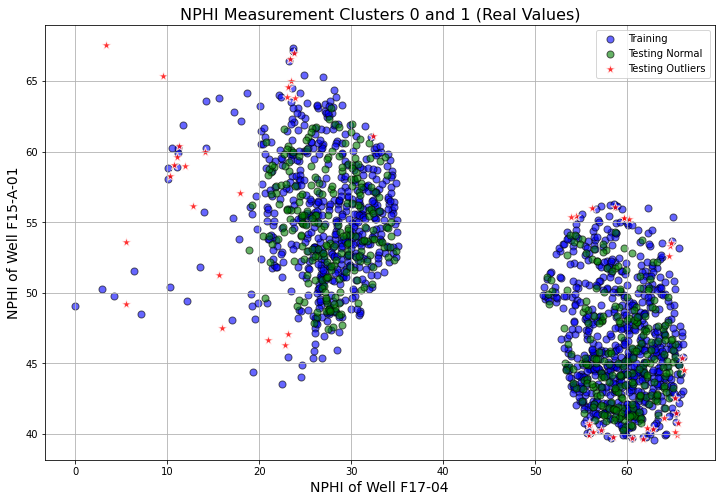

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import os

# Load the dataset
well_data = pd.read_csv("/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-for-anomaly-detection-master/datasets/GMM/normalized_Orginal GMM DATA, NPHI.csv")

# Data preprocessing: Impute missing values
imputer = SimpleImputer(strategy="mean")
well_data_imputed = imputer.fit_transform(well_data)
well_data = pd.DataFrame(well_data_imputed, columns=well_data.columns)

# Scaling only the gamma ray measurements
X_gamma_only = well_data[["NPHI_F17-04", "NPHI_F15-A-01"]]
scaler = StandardScaler()
X_gamma_only_scaled = scaler.fit_transform(X_gamma_only)

# Apply clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_gamma_only_scaled)

# Inverse transform to real values
X_gamma_only_real = scaler.inverse_transform(X_gamma_only_scaled)

# Filter for clusters 0 and 1
cluster_filter = np.isin(y_kmeans, [0, 1])
filtered_data = well_data[cluster_filter]
filtered_clusters = y_kmeans[cluster_filter]
X_filtered = X_gamma_only_real[cluster_filter]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, filtered_clusters, test_size=0.3, random_state=42)

# Use Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)
outlier_preds = iso_forest.predict(X_test)

# IsolationForest labels outliers as -1, and inliers as 1
test_outliers = outlier_preds == -1

# Separate the data
train_data = pd.DataFrame(X_train, columns=["NPHI_F17-04", "NPHI_F15-A-01"])
train_data["Cluster"] = y_train
test_normal_data = pd.DataFrame(X_test[~test_outliers], columns=["NPHI_F17-04", "NPHI_F15-A-01"])
test_normal_data["Cluster"] = y_test[~test_outliers]
test_outliers_data = pd.DataFrame(X_test[test_outliers], columns=["NPHI_F17-04", "NPHI_F15-A-01"])
test_outliers_data["Cluster"] = y_test[test_outliers]

# Combine normal test data and outlier test data
combined_test_data = pd.concat([test_normal_data, test_outliers_data])

# Ensure directories exist
output_dir = "/home/g202103050/Documents/A.Rahman/GAN anomally detection/Gans-GMM work/prof Tapan/orginal datset/"
os.makedirs(output_dir, exist_ok=True)

# Save the data
train_data.to_csv(os.path.join(output_dir, "train.NPHI.csv"), index=False)
combined_test_data.to_csv(os.path.join(output_dir, "test.NPHI.csv"), index=False)

# Visualization
plt.figure(figsize=(12, 8))

# Plotting training data
plt.scatter(train_data["NPHI_F17-04"], train_data["NPHI_F15-A-01"], c="blue", label="Training", alpha=0.6, edgecolor="k", s=50)

# Plotting normal test data
plt.scatter(test_normal_data["NPHI_F17-04"], test_normal_data["NPHI_F15-A-01"], c="green", label="Testing Normal", marker="o", edgecolor="k", s=50, alpha=0.6)

# Plotting outliers
plt.scatter(test_outliers_data["NPHI_F17-04"], test_outliers_data["NPHI_F15-A-01"], c="red", label="Testing Outliers", marker="*", edgecolor="white", s=100, alpha=0.8)


# Update axis labels to reflect the well names
plt.title("NPHI Measurement Clusters 0 and 1 (Real Values)", fontsize=16)
plt.xlabel("NPHI of Well F17-04", fontsize=14)
plt.ylabel("NPHI of Well F15-A-01", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(output_dir, "NPHI_measurement_clusters.png"), dpi=600, bbox_inches="tight")
plt.show()
